## Algoritmo KMM

Importando bibliotecas a serem utilizadas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

Importando base de dados

In [2]:
data = load_iris()

Separando e normalizando a base de dados

In [3]:
X = data.data
y = data.target

df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

print(df)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

Instânciando KNN da Scikit Learn e treinando

In [4]:
knn = KNeighborsClassifier(n_neighbors=5) # com 10 vizinhos mais próximos
knn.fit(X_train, y_train)

KNeighborsClassifier()

Fazendo a predição dos resultados

In [5]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisão do modelo: {accuracy:.2f}")

Precisão do modelo: 0.91


## Representação visual dos resultados

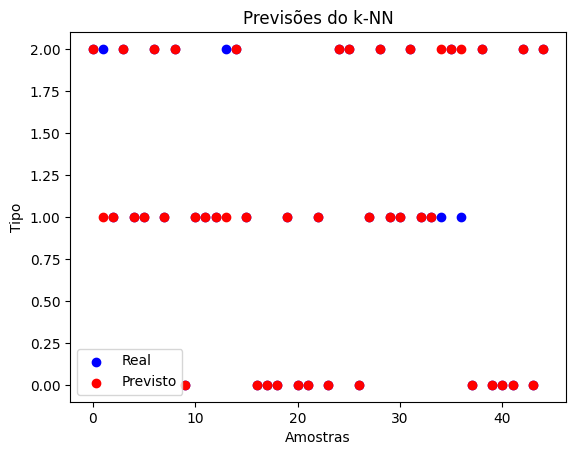

In [6]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Previsto')
plt.xlabel('Amostras')
plt.ylabel('Tipo')
plt.title('Previsões do k-NN')
plt.legend()
plt.show()

## Recebendo novo caso

In [7]:
new_data = []
for i in range(X.shape[1]):
    value = float(input(f"Insira o valor para a feature {data.feature_names[i]}: "))
    new_data.append(value)

new_data_normalized = scaler.transform([new_data])

X_normalized = np.append(X_normalized, new_data_normalized, axis=0)
X_normalized = scaler.fit_transform(X)
X_normalized = np.delete(X_normalized, -1, axis=0)

Prevendo novo caso

In [8]:
predict = knn.predict(new_data_normalized)

print(data.target_names[predict[0]])

versicolor


ValueError: 'c' argument has 150 elements, which is inconsistent with 'x' and 'y' with size 149.

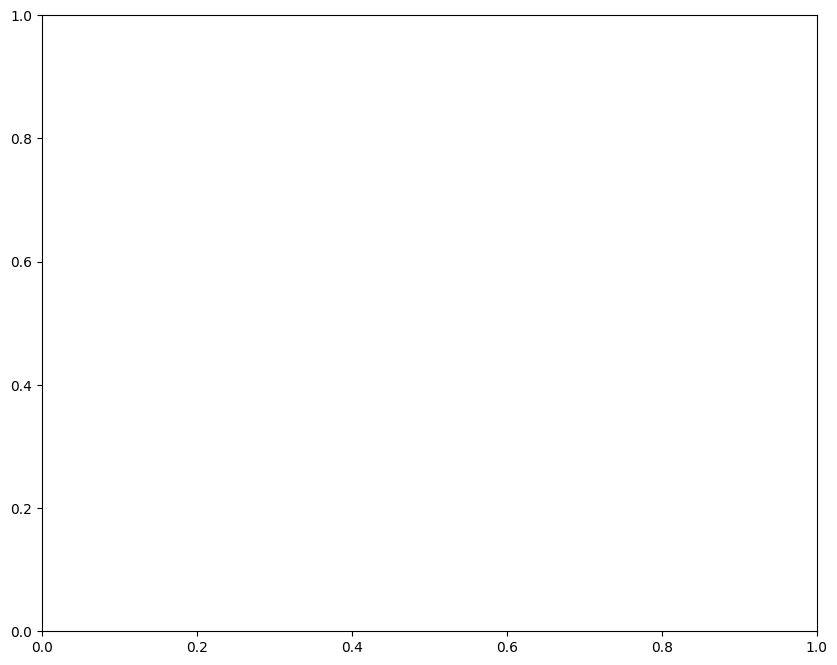

In [9]:
distances, indices = knn.kneighbors(new_data_normalized)
nearest_neighbors = indices[0]

plt.figure(figsize=(10, 8))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap='viridis', label='Data Points')
plt.scatter(X_normalized[nearest_neighbors, 0], X_normalized[nearest_neighbors, 1], marker='x', c='red', s=100, label='Nearest Neighbors')
plt.scatter(new_data_normalized[0][0], new_data_normalized[0][1], marker='*', c='black', s=200, label='New Data')
plt.xlabel('Feature 0 (Normalized)')
plt.ylabel('Feature 1 (Normalized)')
plt.title('Scatter Plot of Nearest Neighbors')
plt.legend()

for neighbor in nearest_neighbors:
    plt.annotate(f'{data.target_names[y[neighbor]]}', (X_normalized[neighbor, 0], X_normalized[neighbor, 1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.show()